# Métodos No Paramétricos en Estadística

Muchas de las pruebas empleadas en estádistica parten del supuesto que los datos proceden de una distribución normal. Sin embargo, existen pruebas donde no es necesario suponer que la población corresponde a la distribución de probabilidad normal. Estas pruebas se denominan **No Paramétricas**

## Prueba de Bondad de Ajuste

La prueba de bondad de ajuste es una de las pruebas estadísticas de uso más común. Es particularmente útil porque requiere sólo un nivel nominal de medición. Por ello es posible llevar a cabo una prueba de hipótesis con datos que han sido clasificados en grupos. Como su nombre lo indica, el propósito de la prueba de bondad de ajuste es comparar una distribución observada con una distribución esperada.

El estadístico de prueba en este caso es *chi-cuadrada* ($\chi^{2}$):

$$
\chi^{2} = \sum \left[ \frac{(f_{o} - f_{e})^{2}}{f_{e}} \right]
$$

con $k-1$ grados de libertad, donde:

* $k$ es el número de categorías
* $f_{o}$ es la frecuencia observada en una categoría en particular
* $f_{e}$ es la frecuencia esperada en una categoría en particular

Las hipótesis se plantean:

* $H_{0}:$ No hay diferencia entre las proporciones de las categorías.
* $H_{1}:$ Existe diferencia entre las proporciones de las categorías.

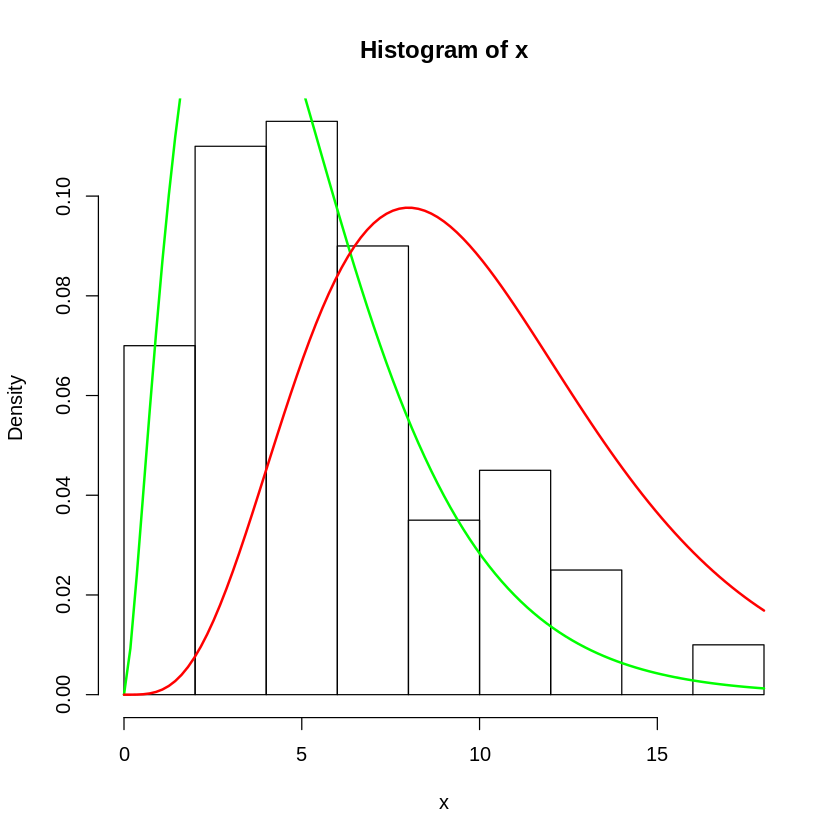

In [ ]:
x <- rchisq(100, 5)
hist(x, prob=TRUE)
curve( dchisq(x, df=5), col='green', lwd = 2, add=TRUE)
curve( dchisq(x, df=10), col='red', lwd = 2, add=TRUE )

### Veamos un ejemplo:

Bubba’s Fish and Pasta es una cadena de restaurantes ubicados a lo largo de la costa del Golfo de Florida. Bubba, el propietario, desea añadir filete a su menú. Antes de hacerlo, decide contratar a Magnolia Research, LLC, para que lleve a cabo una encuesta entre personas adultas para saber cuál es su platillo favorito cuando comen fuera de casa. Magnolia seleccionó una muestra de 120 adultos y les pidió que indicaran su comida favorita cuando salen a cenar. Los resultados se reportan en la siguiente tabla:

| **Plato Favorito** | **Frecuencia** |
|:--------------:|:----------:|
| Pollo          |         32 |
| Pescado        |         24 |
| Carne          |         35 |
| Pasta          |         29 |
| **Total**          |        **120** |

El valor de la frecuencia esperada se plante desde la forma como se distribuyen los datos. La hipótesis nula plantea que no hay diferencias, por lo tanto, se esperarían frecuencias iguales:

| **Plato Favorito** | **F. Observada** | **F. Esperada** |
|:--------------:|:----------:|:----------:|
| Pollo          |         32 |         30 |
| Pescado        |         24 |         30 |
| Carne          |         35 |         30 |
| Pasta          |         29 |         30 |
| **Total**          |        **120** |        **120** |

Vamos a resolverlo en R:

In [ ]:
## Generamos los datos:
plato<-c(rep('Pollo',32), rep('Pescado',24), rep('Carne',35), rep('Pasta',29))
plato

[1] "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"  
  [8] "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"  
 [15] "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"  
 [22] "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pollo"  
 [29] "Pollo"   "Pollo"   "Pollo"   "Pollo"   "Pescado" "Pescado" "Pescado"
 [36] "Pescado" "Pescado" "Pescado" "Pescado" "Pescado" "Pescado" "Pescado"
 [43] "Pescado" "Pescado" "Pescado" "Pescado" "Pescado" "Pescado" "Pescado"
 [50] "Pescado" "Pescado" "Pescado" "Pescado" "Pescado" "Pescado" "Pescado"
 [57] "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"  
 [64] "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"  
 [71] "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"  
 [78] "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"  
 [85] "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"   "Carne"  
 [92] "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"  
 [99] "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"  
[106] "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"  
[113] "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"   "Pasta"  
[120] "Pasta"

In [ ]:
# Comprobemos las frecuencias:
table(plato)

plato
  Carne   Pasta Pescado   Pollo 
     35      29      24      32 

In [ ]:
# Aplicamos la prueba:
chisq.test(table(plato)) # Debe aplicarse a la tabla


	Chi-squared test for given probabilities

data:  table(plato)
X-squared = 2.2, df = 3, p-value = 0.5319


In [ ]:
with(chisq.test(table(plato)), data.frame(observed,expected))

,plato,Freq,expected
,<fct>,<int>,<dbl>
Carne,Carne,35,30
Pasta,Pasta,29,30
Pescado,Pescado,24,30
Pollo,Pollo,32,30


Vamos a suponer, ahora, que las frecuencias esperadas no son iguales. En el caso de calcular la prueba de manera manual no hay problema, es decir, el total sigue siendo 120, pero se tiene un conocimiento previo sobre la proporción de los platospero cómo lo haríamos en R. Primero, replanteemos la tabla de frecuencias:

| **Plato Favorito** | **F. Observada** | **F. Esperada** |
|:--------------:|:----------:|:----------:|
| Pollo          |         32 |         25 |
| Pescado        |         24 |         30 |
| Carne          |         35 |         45 |
| Pasta          |         29 |         20 |
| **Total**          |        **120** |        **120** |

Veámoslo en R:

In [ ]:
# la tabla sigue siendo la misma:
table(plato)

plato
  Carne   Pasta Pescado   Pollo 
     35      29      24      32 

In [ ]:
# Necesitamos fijar las proporciones:
p <- c(45,20,30,25)

In [ ]:
# Incluimos el argumento:
chisq.test(table(plato), p = p, rescale.p = TRUE)


	Chi-squared test for given probabilities

data:  table(plato)
X-squared = 9.4322, df = 3, p-value = 0.02406


## Prueba de Independencia (Tablas de Contingencia)

El estadístico $\chi^{2}$ sirve para probar de manera formal si hay una relación entre dos variables con escala nominal. En otras palabras, ¿es independiente una variable de la otra?

La ecuación es:

$$
\chi^{2} = \sum_{i=1}^{r} \sum_{j=1}^{k} \frac{ \left( n_{ij} - e_{ij} \right)^{2} }{e_{ij}}
$$

Cambia la forma como se calculan los grados de libertad:

$$
gl=(r-1)(k-1)
$$

donde
* $n$ es la frecuencia observada
* $r$ es el número de filas
* $k$ es el número de columnas

Y la frecuencia esperada se calcula:

$$
e_{ij} = \frac{n_{i \cdot} \times n_{\cdot j}}{n}
$$

### Veamos un ejemplo:

Se desea determinar si la preferencia del sabor del helado es independiente del sexo de las personas. En otras palabras, la preferencia del sabor del helado es igual tanto en hombres como mujeres. Las hipótesis serian:

* $H_{0}:$ Son Independientes
* $H_{1}:$ Son Dependientes

La tabla de contingencia es:

|Sexo     | Chocolate | Vainilla | Fresa |
|---------|:---------:|:--------:|:-----:|
| Hombres |       100 |      120 |    60 |
| Mujeres |       350 |      200 |    90 |

Veámoslo en R:

In [ ]:
# Asignamos las frecuencias:

Hombres = c(100, 120, 60)
Mujeres = c(350, 200, 90)

# Construimos el data frame:
helados = as.data.frame(rbind(Hombres, Mujeres))

# Asignamos nombres a las variables
names(helados) = c('Chocolate', 'Vainilla', 'Fresa')

# La tabla queda:
helados

,Chocolate,Vainilla,Fresa
,<dbl>,<dbl>,<dbl>
Hombres,100,120,60
Mujeres,350,200,90


In [ ]:
# Ahora, la prueba:

chisq.test(helados)


	Pearson's Chi-squared test

data:  helados
X-squared = 28.362, df = 2, p-value = 6.938e-07


In [ ]:
# Si los datos provienen de un data.frame, usamos la función table
library(MASS)
data(survey)
head(survey)

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Female,18.5,18.0,Right,R on L,92,Left,Some,Never,173.00,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104,Left,None,Regul,177.80,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87,Neither,None,Occas,NA,NA,16.917
4,Male,18.8,18.9,Right,R on L,NA,Neither,None,Never,160.00,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35,Right,Some,Never,165.00,Metric,23.667
6,Female,18.0,17.7,Right,L on R,64,Right,Some,Never,172.72,Imperial,21.000


In [ ]:
dim(survey)

[1] 237  12

In [ ]:
# Vamos a determinar si existe relación entre el sexo y los hábitos de consumo de cigarrillo
with(survey, table(Sex,Smoke))

        Smoke
Sex      Heavy Never Occas Regul
  Female     5    99     9     5
  Male       6    89    10    12

In [ ]:
with(survey, chisq.test(table(Sex,Smoke)))


	Pearson's Chi-squared test

data:  table(Sex, Smoke)
X-squared = 3.5536, df = 3, p-value = 0.3139


In [ ]:
with(survey, chisq.test(table(Smoke,Sex)))


	Pearson's Chi-squared test

data:  table(Smoke, Sex)
X-squared = 3.5536, df = 3, p-value = 0.3139


## Prueba de Signos (Datos Ordenados)

El test no paramétrico prueba de los rangos con signo de Wilcoxon, también conocido como _Wilcoxon signed-rank test_, permite comparar poblaciones cuando sus distribuciones (normalmente interpretadas a partir de las muestras) no satisfacen las condiciones necesarias para otros pruebas paramétricas. Es una alternativa la prueba _t_ de muestras dependientes (pareadas) cuando las muestras no siguen una distribución normal (muestran asimetría o colas) o cuando tienen un tamaño tan pequeño que no permite determinar si realmente proceden de poblaciones normales.

**Condiciones para la prueba:**

* Los datos tienen que ser dependientes.
* Los datos tienen que ser ordinales, se tienen que poder ordenar de menor a mayor o viceversa.
* No es necesario asumir que las muestras se distribuyen de forma normal o que proceden de poblaciones normales. Pero sea cual sea el tipo de distribución de las diferencias, tiene que ser simétrica.
* A pesar de considerarse el equivalente no paramétrico del t-test, el Wilcoxon signed-rank test trabaja con medianas, no con medias.
* Preferible al t-test cuando hay valores atípicos, no hay normalidad de los datos o el tamaño de las muestras es pequeño. 

El estadístico de prueba es muy básico, consiste n calcular el mínimo entre la suma de los rangos positivos y negativos:

$$
W = min(W+,W-)
$$

Donde:

* $W+$ es suma de los rangos con signo positivo
* $W-$ es suma de los rangos con signo negativo


Para tener en cuenta:
* Si $n<25$ se usa la tabla Wilcoxon
* Si $n>25$ se usa la tabla Z calculando el valor de así:

$$
Z = \frac{W - \frac{n(n+1)}{4}}{\sqrt{\frac{n(n1+1)(2n+1)}{12}}} \sim N(0,1)
$$


### Ejemplo

Supóngase que se dispone de dos muestras pareadas, de las que no se conoce el tipo de distribución de las poblaciones de las que proceden y cuyo tamaño es demasiado pequeño para determinar si siguen una distribución normal. ¿Existe una diferencia significativa?

**Nota:** _Se emplea un ejemplo con muestras pequeñas para poder ilustrar fácilmente los pasos, no significa que con muestras tan pequeñas el Wilcoxon Signed-rank test sea muy preciso_

Las hipótesis son:

* $H_{0}: mediana = 0$
* $H_{1}: mediana \neq 0$

In [ ]:
# Escribamos los resultados:

antes       <- c( 2, 5, 4, 6, 1, 3 )
despues     <- c( 5, 6, 2, 7, 1, 6 )

In [ ]:
# Calculamos las diferencias
diferencias <- c(antes - despues)
rbind(antes, despues, diferencias)

antes,2,5,4,6,1,3
despues,5,6,2,7,1,6
diferencias,-3,-1,2,-1,0,-3


In [ ]:
# Se asigna al valor absoluto de cada diferencia un número de posición, siendo la posición 1 para el valor más pequeño.
# En caso de haber valores repetidos, fenómeno conocido como ligadura o ties, se les asigna como valor de posición
# la media de las posiciones que ocupan. En la asignación de posiciones se ignoran las diferencias que sean 0.

rangosdiferencias <- rank(abs(diferencias[diferencias != 0])) 
# La función rank() de R calcula las posiciones automáticamente, solucionando las ligaduras en caso de que las haya.

rangosdiferencias <- c(rangosdiferencias[1:4], 0, rangosdiferencias[5]) 
# Se incorpora un 0 en la posición que ocupan las diferencias nulas para cuadrar las posiciones.

rangosdiferencias

[1] 4.5 1.5 3.0 1.5 0.0 4.5

In [ ]:
# Se organiza la información

tabla <- data.frame(antes = antes, despues = despues, signo = sign(diferencias),
                    diferencia = abs(diferencias), rangos = rangosdiferencias)
tabla

antes,despues,signo,diferencia,rangos
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,5,-1,3,4.5
5,6,-1,1,1.5
4,2,1,2,3.0
6,7,-1,1,1.5
1,1,0,0,0.0
3,6,-1,3,4.5


In [ ]:
# Se calcula el estadístico
sumaPositivos <- sum(tabla[tabla$signo == 1,"rangos"])
sumaPositivos

[1] 3

In [ ]:
sumaNegativos <- sum(tabla[ tabla$signo == -1,"rangos"] )
sumaNegativos

[1] 12

In [ ]:
W <- min(c( sumaPositivos, sumaNegativos ))
W

[1] 3

In [ ]:
# Veamos la función:

wilcox.test(x = antes, y = despues, alternative = "two.sided", mu = 0, paired = TRUE)

Warning message in wilcox.test.default(x = antes, y = despues, alternative = "two.sided", :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = antes, y = despues, alternative = "two.sided", :
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  antes and despues
V = 3, p-value = 0.2763
alternative hypothesis: true location shift is not equal to 0


En la salida devuelta por `wilcox.test()`, el estadístico se denomina V en lugar de W.

Cuando hay ligaduras o ties, `wilcox.test()` no es capaz de calcular el p-value exacto, por lo que devuelve un p-value aproximado asumiendo que W se distribuye de forma aproximadamente normal. En estos casos, o cuando los tamaños muestrales son mayores de 25, es recomendable emplear la función  `wilcoxsigned_test()` del paquete `coin`, que devuelve el valor exacto de p-value en lugar de una aproximación.

In [ ]:
install.packages('coin')

In [ ]:
library(coin)
# La función wilcoxsigned_test() del paquete coin requiere pasarle los argumentos en forma de función (~),
# por lo que los datos tienen que estar almacenados en forma de data frame.

datos <- data.frame(antes = antes, despues = despues)
wilcoxsign_test(antes ~ despues, data = datos, distribution = "exact")


	Exact Wilcoxon-Pratt Signed-Rank Test

data:  y by x (pos, neg) 
	 stratified by block
Z = -1.272, p-value = 0.25
alternative hypothesis: true mu is not equal to 0


## Ejercicio

Con base en los datos trabajados en el módulo de muestreo (archivo adjunto en el enlace) extraiga una muestra representativa (calcule el tamaño para un nivel de confianza de 89% y un error de 3% y use ese tamaño específico) y determine si la clasificación en niveles de desempeño en dos de las cinco competencias genéricas son producto del azar o no.

Determine si esos resultados son independientes o dependientes entre sí.

Con la muestra, calcule un promedio general por estudiante para las cinco competencia y realice un ranking inicial y un ranking final por departamento; determine si hubo cambios significativos en esa clasificación

[Descargue el archivo aquí](https://www.dropbox.com/s/xgsf3l5gjw0h0q4/saberpro.RData?dl=1)